In [1]:
#数据可视化一般通过较底层的matplotlib库和较高层的Seaborn库实现的
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)


In [3]:
iris = pd.read_csv("E:/Program Files/coding/book/python book/MachineLearing/train/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


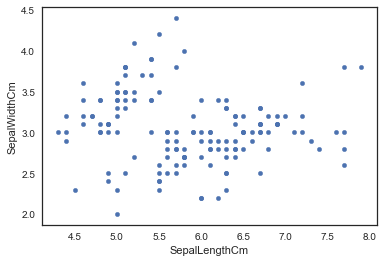

In [5]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

C:\Users\潘兰兰\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\潘兰兰\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


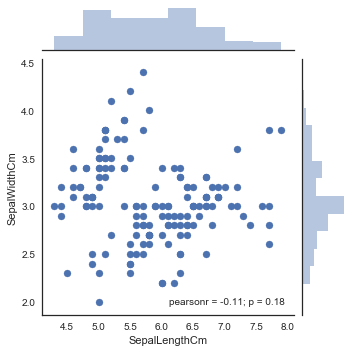

In [6]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

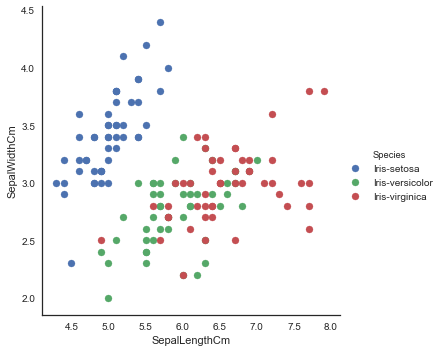

In [7]:
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

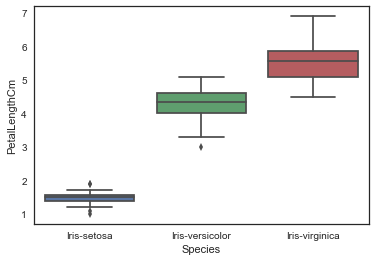

In [8]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

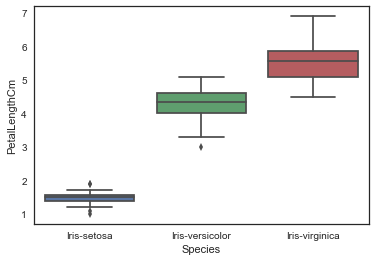

In [9]:
#一种扩展这个plot的方式是添加一个顶部图层，包含一些额外的点
#我们利用jitter=True使这些点不全落在一条线上
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

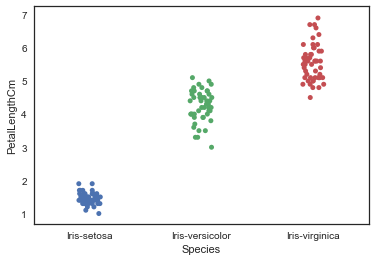

In [10]:
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

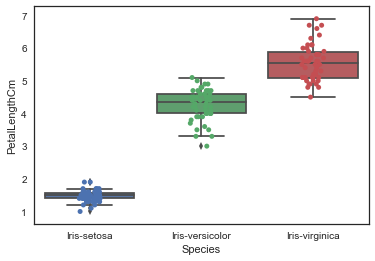

In [11]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

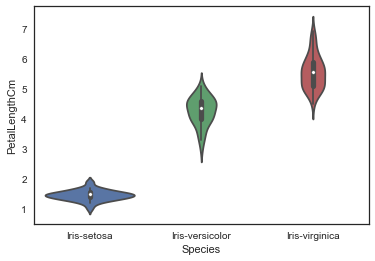

In [12]:
#violin图结合前两个图并简化他们，数据的密度越大，violin图越薄
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

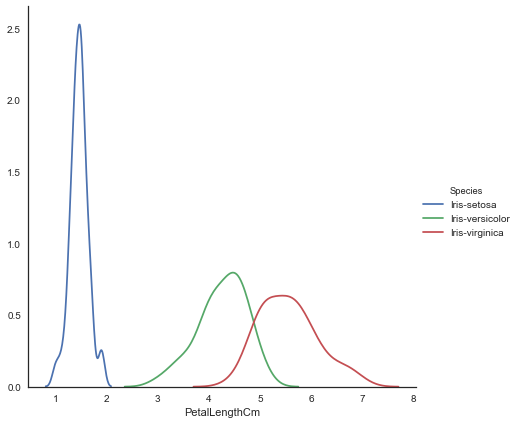

In [13]:
#用于查看单变量关系的最终seaborn图使kdeplot，它可以创建并可视化底层特征的核密度估计
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

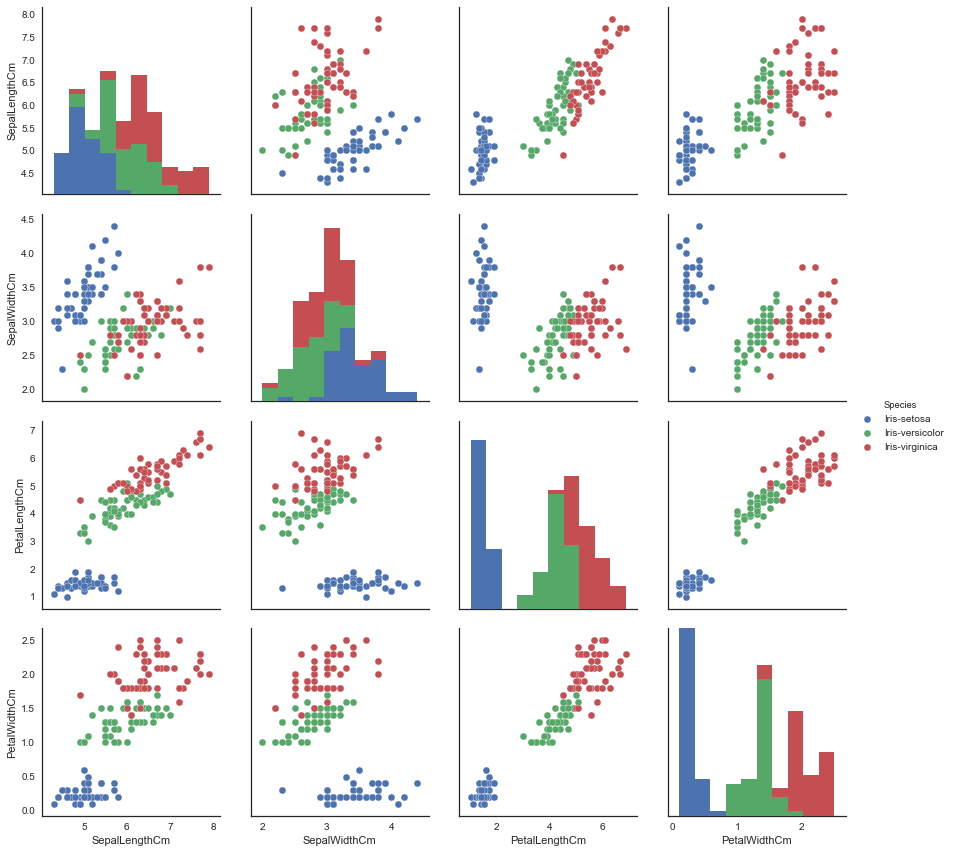

In [14]:
#另一个比较有用的seaborn图是pairplot,其显示了每对功能之间双变量的关系
#在配对图中，我们将看到iris-setosa物种在所有特征组合中与其他两个物种分开
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

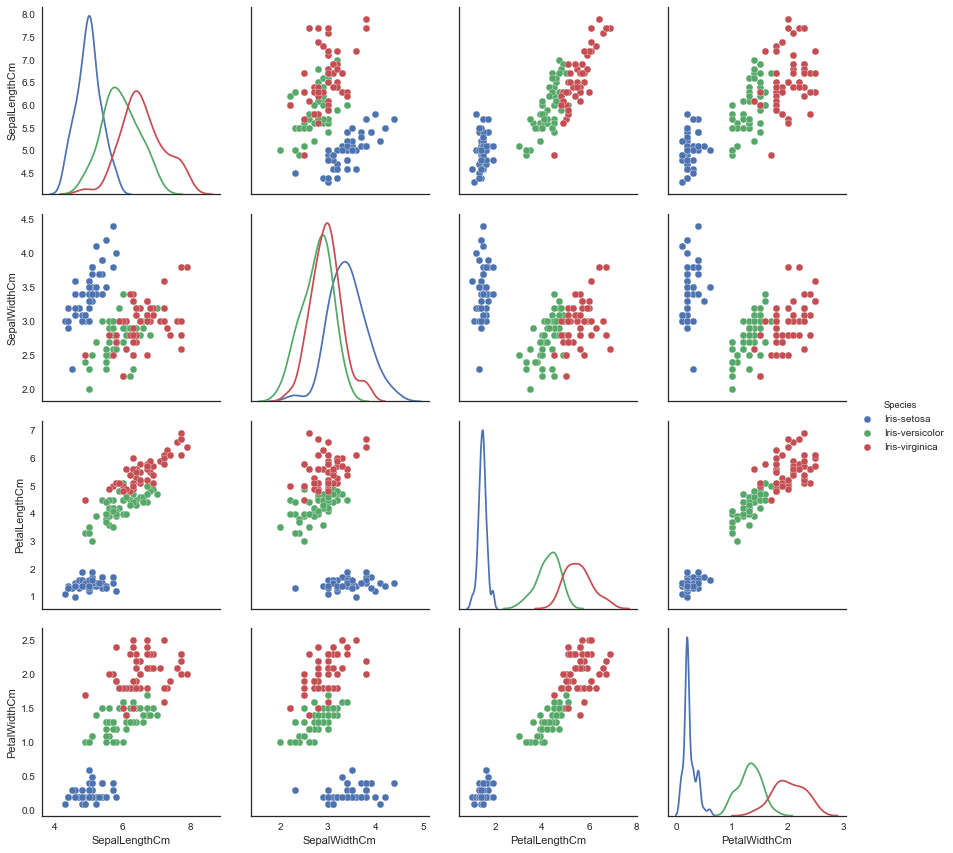

In [15]:
#对图中的对角线元素默认显示直方图，我们可以更新这些元素以显示其他内容如kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7161F7BA8>,
      dtype=object)

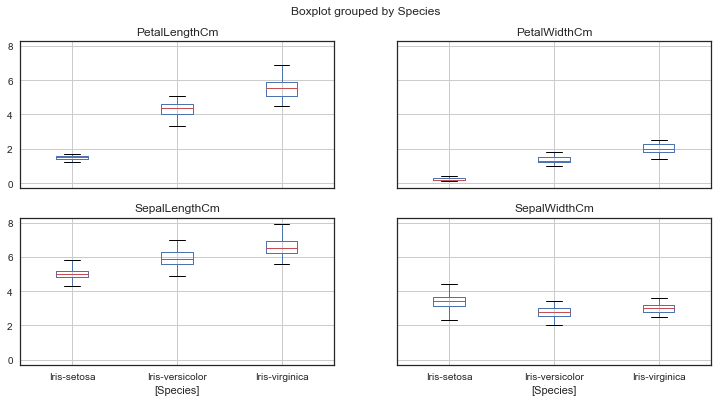

In [16]:
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

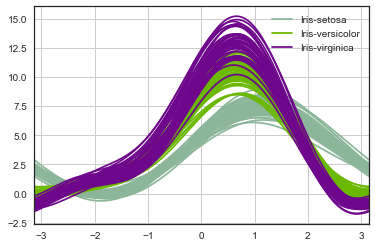

In [17]:
#还有一种酷炫的panda技术叫做安德鲁斯曲线，该曲线涉及使用样本的属性作为傅里叶级数的系数r然后绘制他们
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

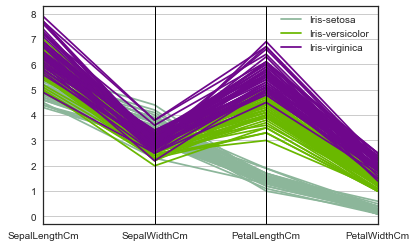

In [18]:
#l另一种多变量可视化pandas技术是parallel_coordinates
#平行坐标将每个要素绘制在单独的列上，然后绘制线条，连接每个数据样本的功能
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

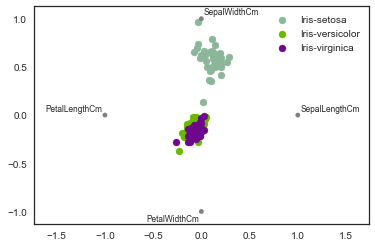

In [19]:
#最后的多变量可视化pandas技术是radviz,其将每个特征作为一个点放在2D平面上进行模拟，使每个样品利用特征的相对值通过弹簧加权连接这些点
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")
#https://www.kaggle.com/benhamner/python-data-visualizations?scriptVersionId=1465139